In [8]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
dataframe = pd.read_csv('winequality-red.csv', delimiter=';')

In [76]:
dataframe.shape

(1599, 12)

In [77]:
dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


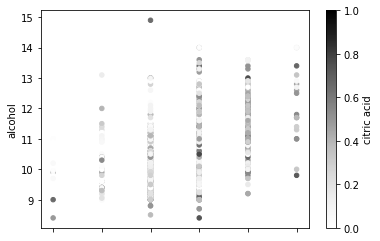

In [114]:
dataframe.plot.scatter(x='quality', y='alcohol', c='citric acid')
#dataframe.plot('Fixed Acidity correlation of quality')
#plt.xlabel('Acidity')
#plt.ylabel('Quality')
#plt.show()

In [140]:
X = dataframe.iloc[:, :-1].values
y = dataset.iloc[:, 0].values

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [157]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [162]:
#LinearRegression().fit(X_train, y_train)
print("Training data size:",X_train.shape)
print("Testing data size:",X_test.shape)

Training data size: (1279, 11)
Testing data size: (320, 11)


In [163]:
X_test.transpose()

array([[12.   , 10.9  ,  7.7  , ...,  6.8  , 10.   ,  7.1  ],
       [ 0.39 ,  0.32 ,  0.57 , ...,  0.815,  0.56 ,  0.59 ],
       [ 0.66 ,  0.52 ,  0.21 , ...,  0.   ,  0.24 ,  0.02 ],
       ...,
       [ 3.18 ,  3.28 ,  3.16 , ...,  3.32 ,  3.18 ,  3.55 ],
       [ 0.63 ,  0.77 ,  0.54 , ...,  0.51 ,  0.56 ,  0.53 ],
       [10.8  , 11.5  ,  9.8  , ...,  9.8  , 10.1  ,  9.7  ]])

In [164]:
def random_coef_gen(data):
    index = data.shape[1]
    coef = np.random.rand(index+1)
    coef[0] = 1
    return coef

In [165]:
def Cost_function_linear(coefficient,data,true_value):
    data_ = data.copy()
    data_.insert(0,'Intercept',1)
    true_value_np = np.reshape(np.array(true_value),(np.array(true_value).shape[0],))
    pred = np.matmul(data_,coefficient)
    cost = 1/2/data.shape[0]*sum((pred-true_value_np)**2)
    return cost

In [166]:
def Gradient_Descent_linear(coefficient, data, true_value, alpha, max_loop):
    cost_history = []
    data_ = data.copy()
    data_.insert(0,'Intercept',1)
    true_value_np = np.reshape(np.array(true_value),(np.array(true_value).shape[0],))
    for loop in range(max_loop):
        w = []
        for j in range(len(coefficient)):
            w.append(np.sum((np.matmul(data_,coefficient)-true_value_np)*data_.ix[:, j]))

        for i in range(len(w)):
            coefficient[i] = coefficient[i] - alpha/data.shape[0]*w[i]
        cost_history.append(Cost_function_linear(coefficient,data,true_value))
        
    return coefficient, cost_history

In [167]:
def Rsquared(coefficient, data, true_value):
    data_ = data.copy()
    data_.insert(0,'Intercept',1)
    true_value_np = np.reshape(np.array(true_value),(np.array(true_value).shape[0],))
    pred = np.matmul(data_,coefficient)
    SStot = sum((true_value_np - np.mean(true_value_np))**2)
    SSres = sum((pred-true_value_np)**2)
    return 1 - SSres/SStot

def MSE(coefficient, data, true_value):
    data_ = data.copy()
    data_.insert(0,'Intercept',1)
    true_value_np = np.reshape(np.array(true_value),(np.array(true_value).shape[0],))
    pred = np.matmul(data_,coefficient)
    print(pred)
    return sum((pred-true_value_np)**2)

def pred_linear(coefficient, data):
    data_ = data.copy()
    data_.insert(0,'Intercept',1)
    pred = np.matmul(data_,coefficient)
    return pred

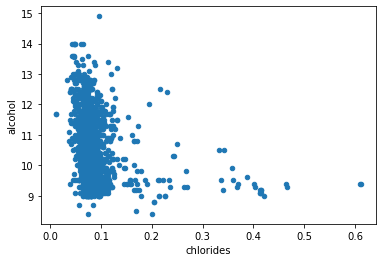

In [190]:
dataframe.plot.scatter(x='chlorides', y='alcohol')

In [181]:
#X_test_random = X_test[X.[np.random.randint(len(X.reshape),size=10)]]

X_train_all = X_train
X_test_all = X_test

#X_train_t10 = X_train[top_10]
#X_test_t10 = X_test[top_10]